#DATA TRANSFORMATION and CLEANING
##MOVIES AND TV SHOWS

# Missing Values and Duplicate Rows Handling - TV Shows

## Library Loading

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Function Creation

### Plotting Missing Values

In [ ]:
def missing_values_plot(dfName):
    plt.figure(figsize=(10, 6))
    plt.imshow(~dfName.isnull(), aspect='auto', cmap='gray', interpolation='none')

    plt.xlabel("Columns")
    plt.ylabel("Rows")
    plt.title("Missing Values Heatmap")
    plt.xticks(ticks=np.arange(dfName.shape[1]), labels=dfName.columns, rotation=90)
    plt.yticks([])  # Hide row indices for clarity

    plt.show()

### Viewing Missing Values and Data Types

In [ ]:
def missing_values_table(dfName):
    missing_data = pd.DataFrame({
        'Column': dfName.columns,
        'Missing Values': dfName.isnull().sum().values,
        'Data Type': dfName.dtypes.values
    })
    print(missing_data)

### Number of Duplicated Rows

In [ ]:
def duplicate_count(dfName):
    num_duplicates = dfName.duplicated().sum()
    print(f"Number of duplicated rows in the dataset is: {num_duplicates}")

### Replacing Missing Values

In [ ]:
def replace_with_null(dfName, columnName):
    if columnName in dfName.columns:
        dfName[columnName].fillna('NULL', inplace=True)
        print(f"Missing values in column '{columnName}' replaced with 'NULL'.")
    else:
        print(f"Column '{columnName}' not found in the df.")

    return dfName

In [ ]:
def replace_with_na(dfName, columnName):
    if columnName in dfName.columns:
        dfName[columnName].fillna(pd.NA, inplace=True)
        print(f"Missing values in column '{columnName}' replaced with NA.")
    else:
        print(f"Column '{columnName}' not found in the df.")

    return dfName

### Drop Duplicate Rows

In [ ]:
def drop_duplicated_rows(dfName):
    return dfName.loc[dfName.isnull().sum(axis=1).argsort()].drop_duplicates(keep='first').sort_index()

### Drop Missing Values

In [ ]:
def drop_missing_in_column(dfName, columnName):
    return dfName.dropna(subset=[columnName])

## Datasets Cleaning

### Dataset 1: TV_Show(Airings)

In [ ]:
df1 = pd.read_csv("TV_Show(Airings)_final.csv")

In [ ]:
missing_values_table(df1)

              Column  Missing Values Data Type
0                 ID               0     int64
1   First_Aired_Date              17    object
2  Latest_Aired_Date             875    object
3             Status               0    object


In [ ]:
duplicate_count(df1)

Number of duplicated rows in the dataset is: 3474


In [ ]:
df1 = drop_duplicated_rows(df1)

In [ ]:
duplicate_count(df1)

Number of duplicated rows in the dataset is: 0


In [ ]:
missing_values_table(df1)

              Column  Missing Values Data Type
0                 ID               0     int64
1   First_Aired_Date              17    object
2  Latest_Aired_Date             790    object
3             Status               0    object


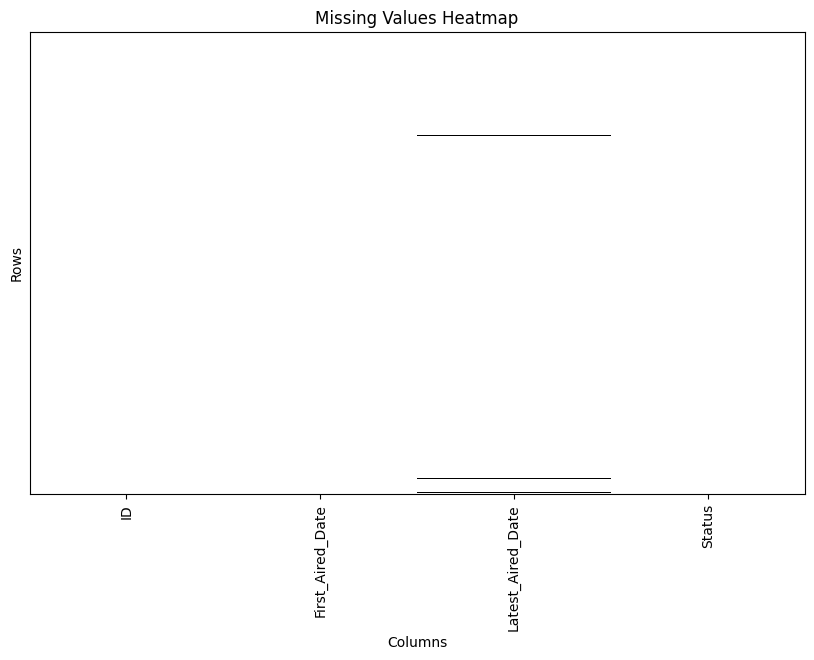

In [ ]:
missing_values_plot(df1)

In [ ]:
replace_with_null(df1, 'First_Aired_Date')

Missing values in column 'First_Aired_Date' replaced with 'NULL'.


<ipython-input-58-9c493ea7d1b8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfName[columnName].fillna('NULL', inplace=True)


,ID,First_Aired_Date,Latest_Aired_Date,Status
0,291,1960-12-09,2025-02-19,Returning Series
1,25098,1960-06-27,1961-03-09,Ended
2,2181,1960-10-07,1964-03-20,Ended
3,1996,1960-09-30,1966-04-01,Ended
4,8392,1960-06-10,1963-05-05,Ended
...,...,...,...,...
153481,285290,2025-03-07,NaN,Returning Series
153482,285289,NULL,NaN,Returning Series
153483,285287,2025-02-02,2025-02-23,Returning Series
153484,285282,2025-02-14,2025-02-14,Returning Series


In [ ]:
replace_with_null(df1, 'Latest_Aired_Date')

Missing values in column 'Latest_Aired_Date' replaced with 'NULL'.


<ipython-input-58-9c493ea7d1b8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfName[columnName].fillna('NULL', inplace=True)


,ID,First_Aired_Date,Latest_Aired_Date,Status
0,291,1960-12-09,2025-02-19,Returning Series
1,25098,1960-06-27,1961-03-09,Ended
2,2181,1960-10-07,1964-03-20,Ended
3,1996,1960-09-30,1966-04-01,Ended
4,8392,1960-06-10,1963-05-05,Ended
...,...,...,...,...
153481,285290,2025-03-07,NULL,Returning Series
153482,285289,NULL,NULL,Returning Series
153483,285287,2025-02-02,2025-02-23,Returning Series
153484,285282,2025-02-14,2025-02-14,Returning Series


In [ ]:
missing_values_table(df1)

              Column  Missing Values Data Type
0                 ID               0     int64
1   First_Aired_Date               0    object
2  Latest_Aired_Date               0    object
3             Status               0    object


In [ ]:
df1.to_csv('TV_Show(Airings)_final_cleaned.csv', index=False)

### Dataset 2: TV_Show(Basic)

In [ ]:
df2 = pd.read_csv("TV_Show(Basic)_final.csv")

In [ ]:
missing_values_table(df2)

          Column  Missing Values Data Type
0             ID               0     int64
1           Name               1    object
2  Original_Name               1    object


In [ ]:
duplicate_count(df2)

Number of duplicated rows in the dataset is: 99


In [ ]:
df2 = drop_duplicated_rows(df2)

In [ ]:
duplicate_count(df2)

Number of duplicated rows in the dataset is: 0


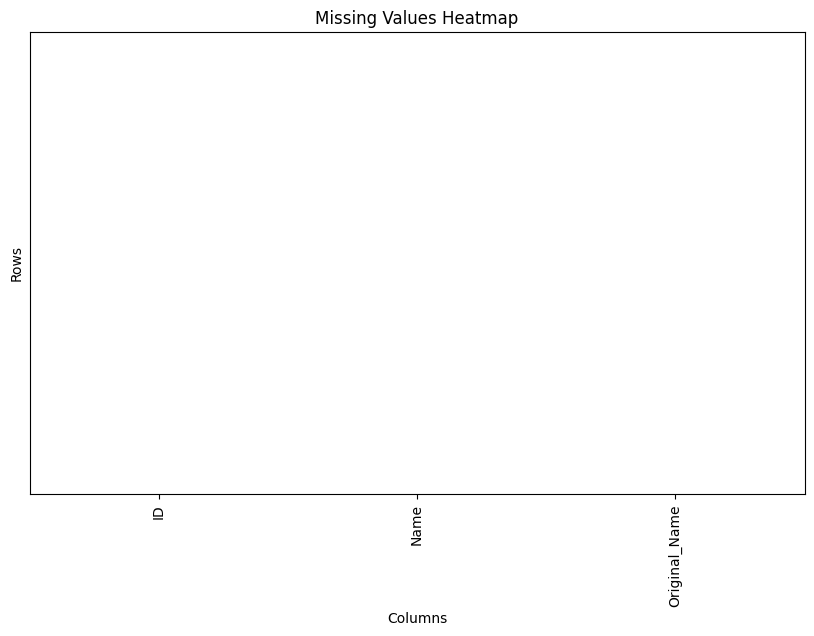

In [ ]:
missing_values_plot(df2)

In [ ]:
replace_with_null(df2, 'Name')

Missing values in column 'Name' replaced with 'NULL'.


<ipython-input-58-9c493ea7d1b8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfName[columnName].fillna('NULL', inplace=True)


,ID,Name,Original_Name
0,291,Coronation Street,Coronation Street
1,25098,Full Circle,Full Circle
2,2181,Route 66,Route 66
3,1996,The Flintstones,The Flintstones
4,8392,Popeye the Sailor,Popeye the Sailor
...,...,...,...
153435,285154,l'm Tly`@,l'm Tly`@
153436,285148,Battre Sex,Battre Sex
153437,285142,Zhi Mian Ji Feng Ba,Zhi Mian Ji Feng Ba
153438,285141,BBB - Big Show,BBB - Big Show


In [ ]:
replace_with_null(df2, 'Original_Name')

Missing values in column 'Original_Name' replaced with 'NULL'.


<ipython-input-58-9c493ea7d1b8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfName[columnName].fillna('NULL', inplace=True)


,ID,Name,Original_Name
0,291,Coronation Street,Coronation Street
1,25098,Full Circle,Full Circle
2,2181,Route 66,Route 66
3,1996,The Flintstones,The Flintstones
4,8392,Popeye the Sailor,Popeye the Sailor
...,...,...,...
153435,285154,l'm Tly`@,l'm Tly`@
153436,285148,Battre Sex,Battre Sex
153437,285142,Zhi Mian Ji Feng Ba,Zhi Mian Ji Feng Ba
153438,285141,BBB - Big Show,BBB - Big Show


In [ ]:
missing_values_table(df2)

          Column  Missing Values Data Type
0             ID               0     int64
1           Name               0    object
2  Original_Name               0    object


In [ ]:
df2.to_csv('TV_Show(Basic)_final_cleaned.csv', index=False)

### Dataset 3: TV_Show(Genre)

In [ ]:
df3 = pd.read_csv("TV_Show(Genre)_final.csv")

In [ ]:
missing_values_table(df3)

    Column  Missing Values Data Type
0       ID               0     int64
1  GenreID               0     int64


In [ ]:
duplicate_count(df3)

Number of duplicated rows in the dataset is: 150


In [ ]:
df3 = drop_duplicated_rows(df3)

In [ ]:
duplicate_count(df3)

Number of duplicated rows in the dataset is: 0


In [ ]:
df3.to_csv('TV_Show(Genre)_final_cleaned.csv', index=False)

### Dataset 4: TV_Show(GenreID_Genre)

In [ ]:
df4 = pd.read_csv("TV_Show(GenreID_Genre)_final.csv")

In [ ]:
missing_values_table(df4)

    Column  Missing Values Data Type
0  GenreID               0     int64
1    Genre               1    object


In [ ]:
duplicate_count(df4)

Number of duplicated rows in the dataset is: 0


In [ ]:
df4['Genre'].fillna('Not Assigned', inplace=True)

<ipython-input-106-a40eb1915cd1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df4['Genre'].fillna('Not Assigned', inplace=True)


In [ ]:
missing_values_table(df4)

    Column  Missing Values Data Type
0  GenreID               0     int64
1    Genre               0    object


In [ ]:
df4.to_csv('TV_Show(GenreID_Genre)_final_cleaned.csv', index=False)

### Dataset 5: TV_Show(Overview)

In [ ]:
df5 = pd.read_csv("TV_Show(Overview)_final.csv")

In [ ]:
missing_values_table(df5)

     Column  Missing Values Data Type
0        ID               0     int64
1  Synopsis           64891    object


In [ ]:
duplicate_count(df5)

Number of duplicated rows in the dataset is: 89


In [ ]:
df5 = drop_duplicated_rows(df5)

In [ ]:
duplicate_count(df5)

Number of duplicated rows in the dataset is: 0


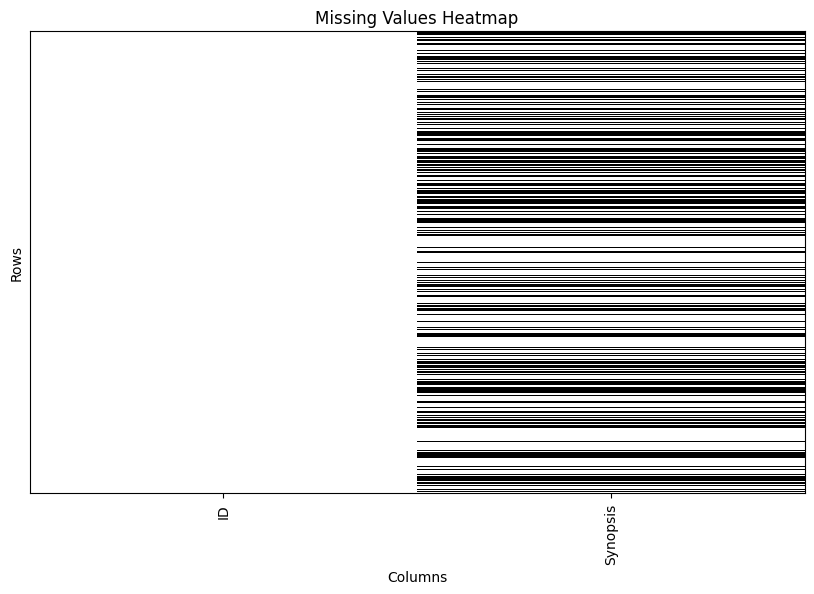

In [ ]:
missing_values_plot(df5)

In [ ]:
replace_with_null(df5, 'Synopsis')

Missing values in column 'Synopsis' replaced with 'NULL'.


<ipython-input-58-9c493ea7d1b8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfName[columnName].fillna('NULL', inplace=True)


,ID,Synopsis
0,291,The residents of Coronation Street are ordinar...
1,25098,Full Circle is a short-lived American soap ope...
2,2181,Route 66 is an American TV series in which two...
3,1996,The misadventures of two modern-day Stone Age ...
4,8392,Follows the adventures of the famed spinach-ea...
...,...,...
153435,285154,"In a dramatic framework, the series deals with..."
153436,285148,NULL
153437,285142,NULL
153438,285141,NULL


In [ ]:
missing_values_table(df5)

     Column  Missing Values Data Type
0        ID               0     int64
1  Synopsis               0    object


In [ ]:
df5.to_csv('TV_Show(Overview)_final_cleaned.csv', index=False)

### Dataset 6: TV_Show(Production)

In [ ]:
df6 = pd.read_csv("TV_Show(Production)_final.csv")

In [ ]:
missing_values_table(df6)

                 Column  Missing Values Data Type
0                    ID               0     int64
1   Executive_Producers          140580    object
2  Production_Companies           84899    object
3              Networks           52013    object


In [ ]:
duplicate_count(df6)

Number of duplicated rows in the dataset is: 53


In [ ]:
df6 = drop_duplicated_rows(df6)

In [ ]:
duplicate_count(df6)

Number of duplicated rows in the dataset is: 0


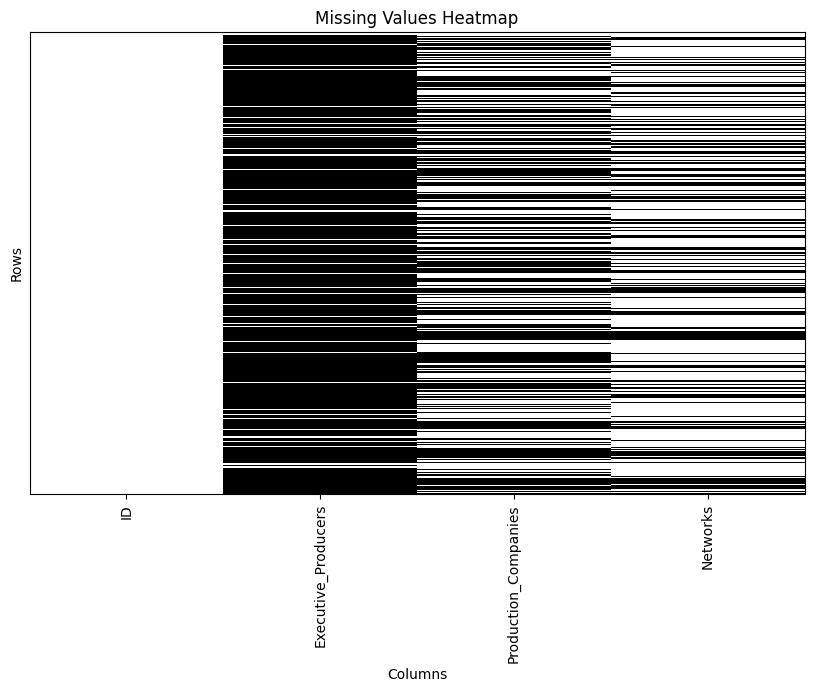

In [ ]:
missing_values_plot(df6)

In [ ]:
replace_with_null(df6, 'Executive_Producers')

Missing values in column 'Executive_Producers' replaced with 'NULL'.


<ipython-input-58-9c493ea7d1b8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfName[columnName].fillna('NULL', inplace=True)


,ID,Executive_Producers,Production_Companies,Networks
0,291,NULL,ITV Studios,ITV1
1,25098,NULL,NaN,CBS
2,2181,NULL,"Screen Gems Television, Lancer-Edling Producti...",CBS
3,1996,NULL,"Hanna-Barbera Productions, Screen Gems Television",ABC
4,8392,Al Brodax,King Features Syndicate,ABC
...,...,...,...,...
153455,285239,NULL,Insight GG GmbH,NaN
153456,285236,NULL,TV 2,TV 2
153457,285228,NULL,Tencent Video,Tencent Video
153458,285216,NULL,TVB,TVB Jade


In [ ]:
replace_with_null(df6, 'Production_Companies')

Missing values in column 'Production_Companies' replaced with 'NULL'.


<ipython-input-58-9c493ea7d1b8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfName[columnName].fillna('NULL', inplace=True)


,ID,Executive_Producers,Production_Companies,Networks
0,291,NULL,ITV Studios,ITV1
1,25098,NULL,NULL,CBS
2,2181,NULL,"Screen Gems Television, Lancer-Edling Producti...",CBS
3,1996,NULL,"Hanna-Barbera Productions, Screen Gems Television",ABC
4,8392,Al Brodax,King Features Syndicate,ABC
...,...,...,...,...
153455,285239,NULL,Insight GG GmbH,NaN
153456,285236,NULL,TV 2,TV 2
153457,285228,NULL,Tencent Video,Tencent Video
153458,285216,NULL,TVB,TVB Jade


In [ ]:
replace_with_null(df6, 'Networks')

Missing values in column 'Networks' replaced with 'NULL'.


<ipython-input-58-9c493ea7d1b8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfName[columnName].fillna('NULL', inplace=True)


,ID,Executive_Producers,Production_Companies,Networks
0,291,NULL,ITV Studios,ITV1
1,25098,NULL,NULL,CBS
2,2181,NULL,"Screen Gems Television, Lancer-Edling Producti...",CBS
3,1996,NULL,"Hanna-Barbera Productions, Screen Gems Television",ABC
4,8392,Al Brodax,King Features Syndicate,ABC
...,...,...,...,...
153455,285239,NULL,Insight GG GmbH,NULL
153456,285236,NULL,TV 2,TV 2
153457,285228,NULL,Tencent Video,Tencent Video
153458,285216,NULL,TVB,TVB Jade


In [ ]:
missing_values_table(df6)

                 Column  Missing Values Data Type
0                    ID               0     int64
1   Executive_Producers               0    object
2  Production_Companies               0    object
3              Networks               0    object


In [ ]:
df6.to_csv('TV_Show(Production)_final_cleaned.csv', index=False)

### Dataset 7: TV_Show(Score)

In [ ]:
df7 = pd.read_csv("TV_Show(Score)_final.csv")

In [ ]:
missing_values_table(df7)

             Column  Missing Values Data Type
0                ID               0     int64
1  Popularity_Score               0   float64


In [ ]:
duplicate_count(df7)

Number of duplicated rows in the dataset is: 21


In [ ]:
df7 = drop_duplicated_rows(df7)

In [ ]:
duplicate_count(df7)

Number of duplicated rows in the dataset is: 0


In [ ]:
missing_values_table(df7)

             Column  Missing Values Data Type
0                ID               0     int64
1  Popularity_Score               0   float64


In [ ]:
df7.to_csv('TV_Show(Score)_final_cleaned.csv', index=False)

### Dataset 8: TV_Show(SeasEps)

In [ ]:
df8 = pd.read_csv("TV_Show(SeasEps)_final.csv")

In [ ]:
missing_values_table(df8)

     Column  Missing Values Data Type
0        ID               0     int64
1   Seasons               0     int64
2  Episodes             420   float64


In [ ]:
duplicate_count(df8)

Number of duplicated rows in the dataset is: 7354


In [ ]:
df8 = drop_duplicated_rows(df8)

In [ ]:
duplicate_count(df8)

Number of duplicated rows in the dataset is: 0


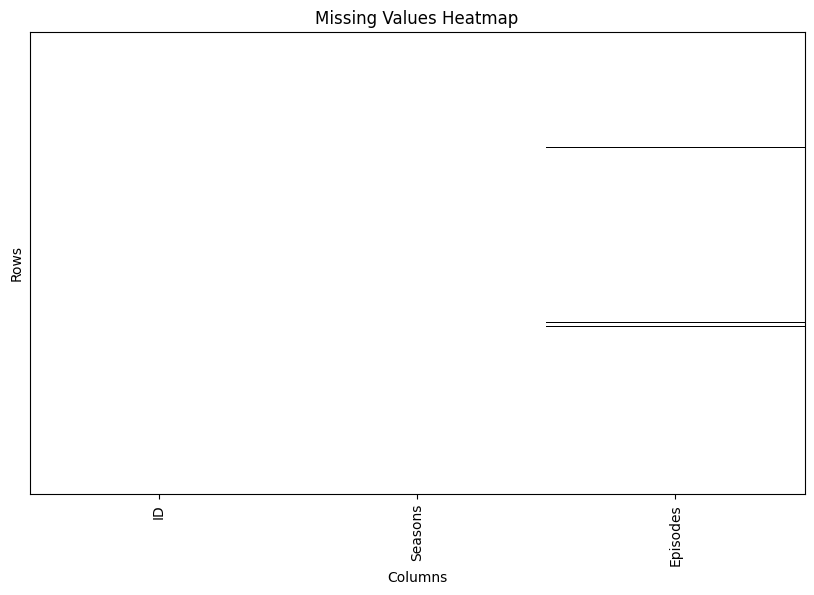

In [ ]:
missing_values_plot(df8)

In [ ]:
replace_with_na(df8, 'Episodes')

Missing values in column 'Episodes' replaced with NA.


<ipython-input-59-13af733bc131>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfName[columnName].fillna(pd.NA, inplace=True)


,ID,Seasons,Episodes
0,291,66,3950.0
1,25098,1,182.0
2,2181,4,116.0
3,1996,6,166.0
4,8392,2,230.0
...,...,...,...
153442,285239,0,NaN
153443,285236,0,NaN
153444,285228,1,1.0
153445,285216,1,5.0


In [ ]:
missing_values_table(df8)

     Column  Missing Values Data Type
0        ID               0     int64
1   Seasons               0     int64
2  Episodes             387   float64


Here we still see missing values because of how Python interprets "NA", however as they have been explicitly replaced with that value, SQL will be able to handle it.

In [ ]:
df8.to_csv('TV_Show(SeasEps)_final_cleaned.csv', index=False)

### Dataset 9: TV_Show(Status)

In [ ]:
df9 = pd.read_csv("TV_Show(Status)_final.csv")

In [ ]:
missing_values_table(df9)

   Column  Missing Values Data Type
0      ID               0     int64
1  Status               0    object


In [ ]:
duplicate_count(df9)

Number of duplicated rows in the dataset is: 3475


In [ ]:
df9 = drop_duplicated_rows(df9)

In [ ]:
duplicate_count(df9)

Number of duplicated rows in the dataset is: 0


In [ ]:
missing_values_table(df9)

   Column  Missing Values Data Type
0      ID               0     int64
1  Status               0    object


In [ ]:
df9.to_csv('TV_Show(Status)_final_cleaned.csv', index=False)

### Dataset 10: TV_Show(Status_Description)

In [ ]:
df10 = pd.read_csv("TV_Show(Status_Description)_final.csv")

In [ ]:
missing_values_table(df10)

              Column  Missing Values Data Type
0             Status               0    object
1  Short_Description               0    object
2   Long_Description               0    object


In [ ]:
duplicate_count(df10)

Number of duplicated rows in the dataset is: 0


In [ ]:
df10.to_csv('TV_Show(Status_Description)_final_cleaned.csv', index=False)

# MOVIE TRANSFORMATIONS:

#####Libraries

In [ ]:
pip install Unidecode

In [ ]:
import pandas as pd
from unidecode import unidecode

####Load DF

In [ ]:
df = pd.read_csv("/content/movie_main_clean.csv", engine = 'python')

In [ ]:
df.head(20)

In [ ]:
df.columns

In [ ]:
df.shape

In [ ]:
# remove duplicates
df_unique = df.drop_duplicates(subset=['movie_id'])
df_unique.shape

In [ ]:
df_cleaned = df.dropna()
df_cleaned.shape

####Function for ASCII characters

In [ ]:
def clean_text(value):
    if isinstance(value, str):
        ascii_equiv = unidecode(value)  # Convert accented characters
        return "".join(char if ord(char) < 128 else '?' for char in ascii_equiv)  # Replace non-ASCII with '?'
    return value

####Transforming characters

In [ ]:
df = df.applymap(clean_text)

####CHANGING COLUMN NAMES

In [ ]:
df = df.rename(columns={'id': 'movie_id', "vote_average": "rating",})

In [ ]:
df.head()

In [ ]:
df = df.drop(['backdrop_path', 'homepage', 'imdb_id', 'poster_path'], axis=1)

In [ ]:
df.head()

In [ ]:
print(df.dtypes)

In [ ]:
na_count = df.isna().sum()

print(na_count)

In [ ]:
def replace_with_null(dfName, columnName):
    if columnName in dfName.columns:
        dfName[columnName].fillna('NULL', inplace=True)
        print(f"Missing values in column '{columnName}' replaced with 'NULL'.")
    else:
        print(f"Column '{columnName}' not found in the df.")

    return dfName

In [ ]:
replace_with_null(df, "language_name")

In [ ]:
df['release_date'] = df['release_date'].fillna('NULL')  # Save the changes explicitly

In [ ]:
df[['vote_count', 'rating', 'popularity', 'budget', 'revenue']] = df[['vote_count', 'rating', 'popularity', 'budget', 'revenue']].fillna(pd.NA)

In [ ]:
df.tail()

####Download DF

In [ ]:
df.to_csv("spoken_languages_clean.csv", encoding="ascii", index=False)

In [ ]:
from google.colab import files
files.download("spoken_languages_clean.csv")